## XML (eXtensible Markup Language)
- standard way of structuring data

### 데이터를 전달하기 위한 도구!

html은 원래 display data

1. Text-based (Unicode)
2. No predefined tags
3. Entensible
4. *Validity
    - supporting validation and well-formed properties

잘 짜여졌다고 항상 좋은 것은 아니다!! html이 생각보다 지랄맞음

xml을 Well-formed Documents 되었다면 ㄱㅊ 아니라면 Error!

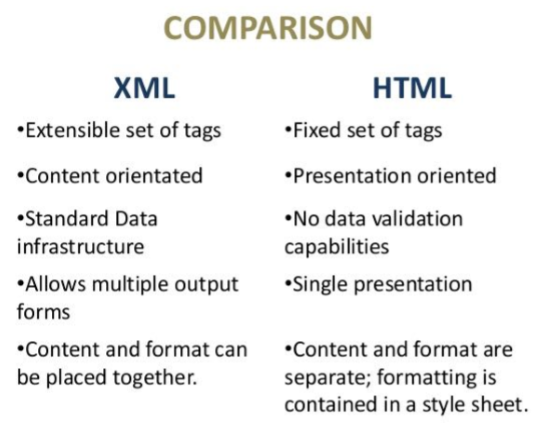

### 그렇다면 JSON과 XML??
1. JSON
    - lightweight
    - more human readable
    - sclar data types
2. XML
    - less simple than JSON
    - must rely on XML Schema
3. 공통점
    - simple and open
    - supports unicode
    - self describing
    - **interoperable or language-independent**
    
개인적으로는 JSON을 추천하심... but XML은 확실히 필요가 하다!

XML은 DOM tree를 형성할 것이다~

string(텍스트)을 넣어주면 알아서 tree를 만들어준다~

그래서 Xpath로써 사용할 것이다. + bs4

In [14]:
import xml.etree.ElementTree as et

In [13]:
from lxml import etree

In [16]:
bookStore = et.Element("bookstore")

In [17]:
book1 = et.Element("book", category="cooking")
bookStore.insert(0,book1)

In [18]:
title1 = et.Element("title")

In [19]:
title1.attrib["lang"] = "en"
title1.text = "Everyday Italian"

In [20]:
book1.append(title1)

In [21]:
et.SubElement(book1, "author").text = "Giada De"

In [22]:
et.SubElement(book1, "year").text = "2005"

In [23]:
et.SubElement(book1, "price").text = "30.00"

In [24]:
book2 = et.Element("book", {"category":"childred"})

In [25]:
title2 = et.Element("title")
title2.attrib["lang"] = title1.get("lang")
title1.text = "Harry Potter"

In [26]:
bookStore.append(book2)

In [27]:
et.SubElement(book2, "author").text = "Giada De"
et.SubElement(book2, "year").text = "2005"
et.SubElement(book2, "price").text = "30.00"

In [28]:
et.dump(bookStore)

<bookstore><book category="cooking"><title lang="en">Harry Potter</title><author>Giada De</author><year>2005</year><price>30.00</price></book><book category="childred"><author>Giada De</author><year>2005</year><price>30.00</price></book></bookstore>


leaf node만 보면 총 4개의 노드가 있는 것

최상위 bookstore 그리고 book이 있고, title, author, year, brice

title에는 attirb가 들어가 있음...

In [30]:
root = et.XML(et.tostring(bookStore))

In [31]:
print(len(root))

2


In [33]:
for childNode in root:
    print(childNode.tag, childNode.attrib)
    
root.clear()

book {'category': 'cooking'}
book {'category': 'childred'}


In [34]:
root = et.fromstring(et.tostring(bookStore))

In [35]:
childNodes = root.getchildren()

In [36]:
print(len(childNodes))

2


In [37]:
for childNode in childNodes[0]:
    print(childNode.tag, childNode.items())

title [('lang', 'en')]
author []
year []
price []


In [38]:
for childNode in childNodes[0]:
    print(childNode.tag, childNode.keys())
    if childNode.keys() != []:
        print([childNode.get(k) for k in childNode.keys()])

title ['lang']
['en']
author []
year []
price []


In [39]:
book = root.find("book")

In [40]:
print(book.tag, book.get("category"))

book cooking


In [43]:
bookList = root.findall("book")

In [44]:
for book in bookList:
    print(book.tag, book.get("category"))

book cooking
book childred


In [45]:
title = root.find(".//title")

In [46]:
print(type(title), title.text)

<class 'xml.etree.ElementTree.Element'> Harry Potter


In [47]:
titleList = root.findall(".//title")
print([title.text for title in titleList])

['Harry Potter']


In [48]:
title = root.findtext(".//title")
print(type(title),title)

<class 'str'> Harry Potter


In [49]:
book = root.find(".//book[@category='childred']")

In [50]:
print(book, book.tag)

<Element 'book' at 0x0000021EA35874A8> book


In [11]:
from xml.etree.ElementTree import ElementTree

In [53]:
tree = ElementTree(root)
tree.write("book_xml.xml", encoding="utf-8", xml_declaration="utf-8")

In [12]:
from xml.etree.ElementTree import parse

In [55]:
tree = parse("book_xml.xml")

In [56]:
root = tree.getroot()

In [58]:
root.findall

<function Element.findall(path, namespaces=None)>

In [59]:
for node in root.iter():
    print(node.tag, node.text)

bookstore None
book None
title Harry Potter
author Giada De
year 2005
price 30.00
book None
author Giada De
year 2005
price 30.00


In [60]:
tree = ElementTree(file="book_xml.xml")
root = tree.getroot()
for node in root.iter():
    print(node.tag, node.text)

bookstore None
book None
title Harry Potter
author Giada De
year 2005
price 30.00
book None
author Giada De
year 2005
price 30.00


### 여기부터 lxml

In [64]:
bookStore = etree.Element("bookstore")

book1 = etree.SubElement(bookStore,"book")
book2 = etree.SubElement(bookStore,"book", attrib={"category":"children"})

book1.attrib["category"] = "cooking"

title1 = etree.Element("title", lang="en")
title1.text = "Everyday Italian"
book1.append(title1)

etree.SubElement(book1, "author").text = "Giada De Laurentiis"
etree.SubElement(book1, "year").text = "2005"
etree.SubElement(book1, "pricer").text = "30.00"

In [66]:
title2 = etree.Element("title")
title2.set("lang" , title1.get("lang"))
title2.text = "Harry Potter"
book2.append(title2)

etree.SubElement(book2, "author").text = "Giada De Laurentiis"
etree.SubElement(book2, "year").text = "2005"
etree.SubElement(book2, "pricer").text = "30.00"

In [67]:
print(len(book2))

4


In [69]:
book2[-1].text = "30.00"

In [70]:
xmlBytes = etree.tostring(bookStore, encoding="utf-8", pretty_print=True, xml_declaration=True)

In [71]:
xmlStr = etree.tounicode(bookStore, pretty_print=True)

In [72]:
print(type(xmlBytes), type(xmlStr))

<class 'bytes'> <class 'str'>


In [73]:
etree.dump(bookStore)

<bookstore>
  <book category="cooking">
    <title lang="en">Everyday Italian</title>
    <author>Giada De Laurentiis</author>
    <year>2005</year>
    <pricer>30.00</pricer>
  </book>
  <book category="children">
    <title lang="en">Harry Potter</title>
    <author>Giada De Laurentiis</author>
    <year>2005</year>
    <pricer>30.00</pricer>
  </book>
</bookstore>


In [74]:
xml = etree.XML(etree.tostring(bookStore))
xmlTree = etree.ElementTree(xml)
xmlRoot = xmlTree.getroot()

In [75]:
xmlTree.docinfo.xml_version

'1.0'

In [76]:
xmlTree.docinfo.encoding

'UTF-8'

In [77]:
xmlTree.docinfo.doctype

''

In [78]:
xmlTree.docinfo.root_name

'bookstore'

In [79]:
len(xmlRoot)

2

In [81]:
for childNode in xmlRoot:
    print(childNode.tag, childNode.attrib)

book {'category': 'cooking'}
book {'category': 'children'}


In [82]:
childNodes = xmlRoot.getchildren()

73페이지 따라하면 될 것이다 당연히 되어야 정상이다~

이미 해본 것이기 때문에.. 그러면 이제 파일을 어떻게 떨굴지만 잘 보면 될 것!

In [83]:
xmlTree.write("book_tree.xml")

In [84]:
etree.ElementTree(xmlRoot).write("book_root.xml")

In [85]:
xmlTree = etree.parse("book_tree.xml")

In [86]:
xmlRoot = xmlTree.getroot()

In [87]:
etree.dump(xmlRoot)

<bookstore>
  <book category="cooking">
    <title lang="en">Everyday Italian</title>
    <author>Giada De Laurentiis</author>
    <year>2005</year>
    <pricer>30.00</pricer>
  </book>
  <book category="children">
    <title lang="en">Harry Potter</title>
    <author>Giada De Laurentiis</author>
    <year>2005</year>
    <pricer>30.00</pricer>
  </book>
</bookstore>


In [88]:
xmlTree = etree.parse("book_root.xml")

In [89]:
xmlRoot = xmlTree.getroot()

In [90]:
etree.dump(xmlRoot)

<bookstore>
  <book category="cooking">
    <title lang="en">Everyday Italian</title>
    <author>Giada De Laurentiis</author>
    <year>2005</year>
    <pricer>30.00</pricer>
  </book>
  <book category="children">
    <title lang="en">Harry Potter</title>
    <author>Giada De Laurentiis</author>
    <year>2005</year>
    <pricer>30.00</pricer>
  </book>
</bookstore>


시도네임이나 station name을 찾아서 

시도네임 or station name , pm25Value

In [1]:
import urllib

In [2]:
url = "http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty"

In [3]:
params = {
    "serviceKey" : "xgnHIwrHEQw%2Bsurbf6sAoGLGAbUyTcXmWcdlkJ07HhGbNyp%2Bzifg1mCXWvJjOylHKsREA915rppfAqmfoA29TQ%3D%3D",
    "numOfRows":10,
    "pageNo":1,
    "sidoName":"서울",
    "dataTerm":"DAILY",
    "ver":1.3,
 }

In [4]:
params["serviceKey"] = urllib.parse.unquote(params["serviceKey"])
params = urllib.parse.urlencode(params)

In [5]:
type(params)

str

In [6]:
params = params.encode("utf-8") ##bytes로만 통신이 가능하기 때문에!!

In [7]:
type(params) 

bytes

In [8]:
req = urllib.request.Request(url, data=params)
res = urllib.request.urlopen(req)
res

In [9]:
resStr = res.read()
type(resStr) ##아직까진 bytes

bytes

In [15]:
xmlObj = etree.fromstring(resStr)

In [16]:
xmlRoot = etree.ElementTree(xmlObj).getroot()

In [17]:
etree.dump(xmlRoot)

<response>
	<header>
		<resultCode>00</resultCode>
		<resultMsg>NORMAL SERVICE.</resultMsg>
	</header>
	<body>
		<items>
			
				<item>
					<stationName>중구</stationName>
					
                        <mangName>도시대기</mangName>
                    
					<dataTime>2019-07-29 03:00</dataTime>
					<so2Value>0.003</so2Value>
					<coValue>0.1</coValue>
					<o3Value>0.005</o3Value>
					<no2Value>0.010</no2Value>
					<pm10Value>12</pm10Value>
					
                        <pm10Value24>16</pm10Value24>
                    
					
				        <pm25Value>5</pm25Value>
				    
				    
                        <pm25Value24>8</pm25Value24>
                    
					<khaiValue>27</khaiValue>
					<khaiGrade>1</khaiGrade>
					<so2Grade>1</so2Grade>
					<coGrade>1</coGrade>
					<o3Grade>1</o3Grade>
					<no2Grade>1</no2Grade>
					<pm10Grade>1</pm10Grade>
					
				        <pm25Grade>1</pm25Grade>
				    
				    
                        <pm10Grade1h>1</pm10Grade1h>
                        <pm

In [18]:
for node in xmlRoot.iter():
    print(node.tag, node.text)

response 
	
header 
		
resultCode 00
resultMsg NORMAL SERVICE.
body 
		
items 
			
				
item 
					
stationName 중구
mangName 도시대기
dataTime 2019-07-29 03:00
so2Value 0.003
coValue 0.1
o3Value 0.005
no2Value 0.010
pm10Value 12
pm10Value24 16
pm25Value 5
pm25Value24 8
khaiValue 27
khaiGrade 1
so2Grade 1
coGrade 1
o3Grade 1
no2Grade 1
pm10Grade 1
pm25Grade 1
pm10Grade1h 1
pm25Grade1h 1
item 
					
stationName 한강대로
mangName 도로변대기
dataTime 2019-07-29 03:00
so2Value 0.004
coValue 0.4
o3Value 0.005
no2Value 0.012
pm10Value 16
pm10Value24 21
pm25Value 6
pm25Value24 8
khaiValue 35
khaiGrade 1
so2Grade 1
coGrade 1
o3Grade 1
no2Grade 1
pm10Grade 1
pm25Grade 1
pm10Grade1h 1
pm25Grade1h 1
item 
					
stationName 종로구
mangName 도시대기
dataTime 2019-07-29 03:00
so2Value 0.003
coValue -
o3Value 0.005
no2Value 0.013
pm10Value 9
pm10Value24 14
pm25Value -
pm25Value24 -
khaiValue -
khaiGrade None
so2Grade 1
coGrade None
o3Grade 1
no2Grade 1
pm10Grade 1
pm25Grade None
pm10Grade1h 1
pm25Grade1h None
item 
					


In [19]:
itemList = xmlRoot.findall(".//item")

In [20]:
print(len(itemList))

10


In [21]:
for item in itemList:
    for i in range(len(item)):
        print(item[i].tag, item[i].text)

stationName 중구
mangName 도시대기
dataTime 2019-07-29 03:00
so2Value 0.003
coValue 0.1
o3Value 0.005
no2Value 0.010
pm10Value 12
pm10Value24 16
pm25Value 5
pm25Value24 8
khaiValue 27
khaiGrade 1
so2Grade 1
coGrade 1
o3Grade 1
no2Grade 1
pm10Grade 1
pm25Grade 1
pm10Grade1h 1
pm25Grade1h 1
stationName 한강대로
mangName 도로변대기
dataTime 2019-07-29 03:00
so2Value 0.004
coValue 0.4
o3Value 0.005
no2Value 0.012
pm10Value 16
pm10Value24 21
pm25Value 6
pm25Value24 8
khaiValue 35
khaiGrade 1
so2Grade 1
coGrade 1
o3Grade 1
no2Grade 1
pm10Grade 1
pm25Grade 1
pm10Grade1h 1
pm25Grade1h 1
stationName 종로구
mangName 도시대기
dataTime 2019-07-29 03:00
so2Value 0.003
coValue -
o3Value 0.005
no2Value 0.013
pm10Value 9
pm10Value24 14
pm25Value -
pm25Value24 -
khaiValue -
khaiGrade None
so2Grade 1
coGrade None
o3Grade 1
no2Grade 1
pm10Grade 1
pm25Grade None
pm10Grade1h 1
pm25Grade1h None
stationName 청계천로
mangName 도로변대기
dataTime 2019-07-29 03:00
so2Value 0.003
coValue 0.3
o3Value 0.004
no2Value 0.013
pm10Value 12
pm10Value

In [22]:
pm25List = xmlRoot.findall(".//item/pm25Value")

In [23]:
for item in pm25List:
    print(item.tag, item.text)

pm25Value 5
pm25Value 6
pm25Value -
pm25Value 6
pm25Value 3
pm25Value 4
pm25Value 9
pm25Value 1
pm25Value -
pm25Value 4


In [24]:
stationList = xmlRoot.findall(".//item/stationName")

In [25]:
print(len(stationList), len(pm25List))

10 10


In [26]:
stationList, pm25List

([<Element stationName at 0x1b699d33b08>,
  <Element stationName at 0x1b699d33ec8>,
  <Element stationName at 0x1b699d33f08>,
  <Element stationName at 0x1b699d33f48>,
  <Element stationName at 0x1b699d33f88>,
  <Element stationName at 0x1b699d33fc8>,
  <Element stationName at 0x1b699d2b048>,
  <Element stationName at 0x1b699d2b088>,
  <Element stationName at 0x1b699d2b0c8>,
  <Element stationName at 0x1b699d2b108>],
 [<Element pm25Value at 0x1b699d33588>,
  <Element pm25Value at 0x1b699d33508>,
  <Element pm25Value at 0x1b699d33688>,
  <Element pm25Value at 0x1b699d33848>,
  <Element pm25Value at 0x1b699d33888>,
  <Element pm25Value at 0x1b699d33908>,
  <Element pm25Value at 0x1b699d33948>,
  <Element pm25Value at 0x1b699d338c8>,
  <Element pm25Value at 0x1b699d33988>,
  <Element pm25Value at 0x1b699d33a48>])

In [27]:
xmlRoot.findall(".//item")[0][0].tag

'stationName'

In [28]:
a=[]; b=[]
for item in itemList:
    for i in range(len(item)):
        if(item[i].tag=="stationName"):
            a.append(item[i].text)
        if(item[i].tag=="pm25Value"):
            b.append(item[i].text)

In [29]:
c = zip(a,b)
[(x,y) for x, y in c]

[('중구', '5'),
 ('한강대로', '6'),
 ('종로구', '-'),
 ('청계천로', '6'),
 ('종로', '3'),
 ('용산구', '4'),
 ('광진구', '9'),
 ('성동구', '1'),
 ('강변북로', '-'),
 ('중랑구', '4')]

In [30]:
[(x.text, y.text) for x, y in zip(stationList, pm25List)]

[('중구', '5'),
 ('한강대로', '6'),
 ('종로구', '-'),
 ('청계천로', '6'),
 ('종로', '3'),
 ('용산구', '4'),
 ('광진구', '9'),
 ('성동구', '1'),
 ('강변북로', '-'),
 ('중랑구', '4')]